Files already downloaded and verified


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
E:\Study\Anaconda\envs\python3.11\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stabl

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | EX_CNN | 1.3 M 
---------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.113     Total estimated model params size (MB)


Training time for batch size 32: 23.41 seconds


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | EX_CNN | 1.3 M 
---------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.113     Total estimated model params size (MB)


Training time for batch size 64: 13.70 seconds


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | EX_CNN | 1.3 M 
---------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.113     Total estimated model params size (MB)


Training time for batch size 128: 10.07 seconds


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.


Training time for batch size 256: 8.98 seconds


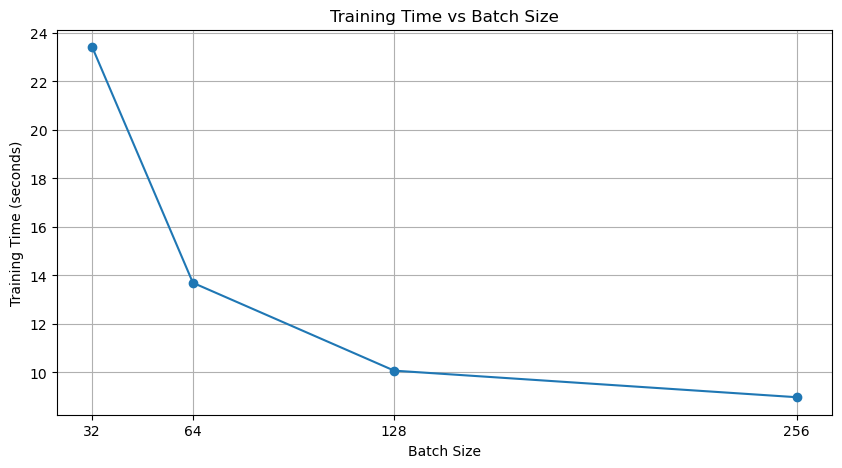

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

# CIFAR-10 transformations
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 datasets and dataloaders
training_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
training_loader = DataLoader(training_data, batch_size=64, shuffle=True)

# The CNN model class
class EX_CNN(nn.Module):
  def __init__(self):
    super(EX_CNN, self).__init__()
    self.convolution_layers = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(32),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(64),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.BatchNorm2d(128)
    )

    # Calculate the flattened feature size for the linear layer
    self._to_linear = None
    self._calculate_to_linear(32, 32)

    self.linear_layers = nn.Sequential(
        nn.Linear(in_features=self._to_linear, out_features=512),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.BatchNorm1d(512),

        nn.Linear(in_features=512, out_features=256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.BatchNorm1d(256),

        nn.Linear(in_features=256, out_features=10) # CIFAR-10 has 10 classes
    )

  # Forward pass calculation for output size of last conv layer
  def _calculate_to_linear(self, l, w):
    x = torch.zeros(1, 3, l, w)
    self._to_linear = self.convolution_layers(x).view(-1).size(0)

  def forward(self, x):
    x = self.convolution_layers(x)
    x = x.view(-1, self._to_linear)  # Flatten the output for the linear layer
    x = self.linear_layers(x)
    return F.log_softmax(x, dim=1)

# PyTorch Lightning module
class LightningEX_CNN(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = EX_CNN()

  def forward(self, x):
    return self.model(x)

  def training_step(self, batch, batch_idx):
    inputs, labels = batch
    outputs = self(inputs)
    loss = nn.NLLLoss()(outputs, labels)
    self.log('train_loss', loss)
    return loss

  def configure_optimizers(self):
    return optim.Adam(self.parameters(), lr=0.001)

# List of batch sizes to test
batch_sizes = [32, 64, 128, 256]
training_times = []

# Loop over each batch size
for batch_size in batch_sizes:
  # Create the DataLoader with the current batch size
  training_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)

  # Instantiate the Lightning model for each batch size to reset weights
  lightning_model = LightningEX_CNN()

  # Initialize a trainer with the data parallel strategy and 1 GPU
  trainer = pl.Trainer(max_epochs=2, accelerator="gpu", devices=-1, strategy='auto')

  # Start timing
  start_time = time.time()

  # Train the model
  trainer.fit(lightning_model, training_loader)

  # End timing
  end_time = time.time()

  # Calculate and store the training time
  training_time = end_time - start_time
  training_times.append(training_time)

  print(f"Training time for batch size {batch_size}: {training_time:.2f} seconds")



# Plotting the training times
plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, training_times, marker='o')
plt.title('Training Time vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (seconds)')
plt.xticks(batch_sizes)
plt.grid(True)
plt.show()
